In [3]:
%matplotlib inline

import os

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from src.config import FIG_DIR, DIARY_DIR

In [4]:
figure_data_file = os.path.join(FIG_DIR, 'fig_2_data.csv')
figure_name = os.path.join(FIG_DIR, 'paper_fig_2.png')

if not os.path.exists(figure_data_file):
    input_data = {}
    data_files = [f for f in os.listdir(DIARY_DIR) if os.path.isfile(os.path.join(DIARY_DIR, f))]
    for data_file in data_files:
            input_data.update({data_file : pd.read_csv(os.path.join(DIARY_DIR, data_file))})

    number_gi = [user_df.iloc[:,-1:].notna().sum()[0] for user_df in input_data.values() ]
    number_gi = [i for i in number_gi if i!= 0]
    number_gi.extend([12])
    number_gi = pd.Series(number_gi)
    number_gi.name = "n_items"
    number_gi.to_csv(figure_data_file, index=False)

# Histogram of number of items in $G(i)$

In [5]:
def plot_fig2(data, figure_name=figure_name, change_default_color='black'):    

    plt.rc('pdf', fonttype=42)
    sns.set(style="ticks")
    sns.set_context('paper', font_scale=1.3)
    plt.subplots(figsize=(6, 3))

    bins = [i_bin - 0.5 for i_bin in range(28)]
    if change_default_color:
        ax = sns.distplot(data, bins=bins, kde=False, color='black')
    else:
        ax = sns.histplot(data=data, bins=bins, shrink=0.9)
    ax.set_xlim(xmin=-0.1, xmax = 30.1)
    ax.set_ylim(ymin=-0.1, ymax = 10.1)

    ax.grid(ls="dotted")
    ax.set_ylabel("Number of participants")
    ax.set_xlabel("Size of ground truth basket")
    sns.despine(offset=10, trim=True)
    
    plt.legend([],[], frameon=False)
    plt.tight_layout()
    plt.savefig(figure_name, dpi=200, transparent=False, bbox_inches='tight', pad_inches=0.0)
    plt.show()


C:\Users\aekpa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


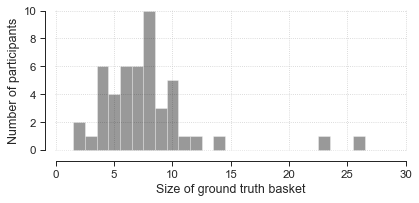

In [6]:
data = pd.read_csv(figure_data_file)
plot_fig2(data)